<a href="https://colab.research.google.com/github/chavanpranali09/Machine_Learning/blob/main/MilkQualityDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df =  pd.read_csv("milk_quality.csv")

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [129]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,3
1,6.6,36,0,1,0,1,253,3
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


**GRADE**    :- 3 = high, 2 = medium, 1 = low

In [130]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [131]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

Text(0.5, 1.0, 'Milk Quality Analysis')

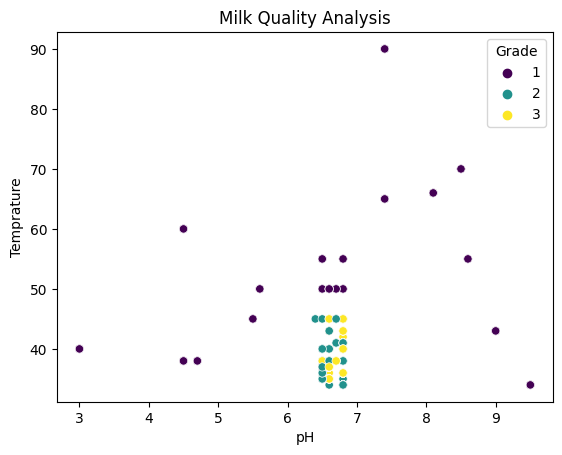

In [132]:
sns.scatterplot(x = "pH", y ="Temprature", hue="Grade", data = df, palette='viridis')
plt.title("Milk Quality Analysis")

In [133]:
x = df.drop("Grade", axis="columns")

In [134]:
x

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [135]:
y = df["Grade"]

In [136]:
y

0       3
1       3
2       1
3       1
4       2
       ..
1054    2
1055    3
1056    1
1057    3
1058    1
Name: Grade, Length: 1059, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
from sklearn.metrics import accuracy_score,classification_report

In [140]:
parameter = {
        'criterion':['gini','entropy','log_loss'],
        'splitter' :['best','random'],
        'max_depth' :[1,2,3,4,5,6,7],
        'max_features': ['auto','sqrt','log2']
}

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
treemodel = DecisionTreeClassifier()

In [143]:
cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [144]:
cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [145]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [146]:
cv.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=7, max_features='sqrt')

In [147]:
y_pred = cv.predict(x_test)

In [148]:
y_pred

array([3, 3, 1, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       3, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 1, 2, 3, 1, 3, 2, 2, 3, 3, 3, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1,
       3, 3, 3, 2, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1,
       2, 3, 1, 1, 2, 3, 2, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 2, 1, 2, 1, 3,
       2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 3, 3, 2, 3, 3, 2, 1, 1, 3, 1, 2,
       1, 2, 1, 2, 3, 2, 3, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 2, 2, 2, 2, 1,
       1, 2, 3, 2, 1, 3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 3, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 3,
       1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       3, 2, 1, 3, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 1,

In [149]:
score=accuracy_score(y_pred,y_test)

In [150]:
score

0.9779874213836478

In [151]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       141
           2       0.95      0.99      0.97       112
           3       1.00      0.95      0.98        65

    accuracy                           0.98       318
   macro avg       0.98      0.97      0.98       318
weighted avg       0.98      0.98      0.98       318

